# How to create custom dataset



In [43]:
import numpy
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from PIL import Image
from torch.utils.data.dataset import Dataset
from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

In [44]:
transformations1 = transforms.Compose([transforms.Grayscale(1),
                                      transforms.RandomVerticalFlip(0.5),
                                      transforms.RandomHorizontalFlip(0.5),
                                      transforms.ToTensor()])

train = ImageFolder('/home/bvieuble/Master/TP1/Train/', transform=transformations1)
test = ImageFolder('/home/bvieuble/Master/TP1/Test/', transform=transformations1)

dataloader_args = dict(shuffle=True, batch_size=64,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)

0
torch.Size([1, 32, 32])


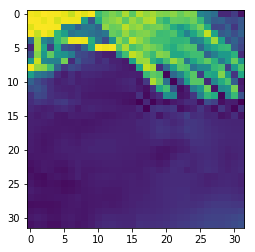

In [45]:
img,label = train.__getitem__(50)
print (label)
print (img.shape)
plt.imshow(img.squeeze(0).permute(0,1))

In [55]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(32*32, 16*16)
        self.fc2 = nn.Linear(16*16, 8*8)
        self.fc3 = nn.Linear(8*8, 3)
    def forward(self, x):
        x = x.view((-1, 1024))
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        h = self.fc3(h)
        return F.log_softmax(h, dim=0)    
    
model = Model()
if cuda:
    model.cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
EPOCHS = 1000
losses = []


# Eval
evaluate_x, evaluate_y = iter(test_loader).next()
evaluate_x = evaluate_x.unsqueeze_(1)


if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()
train_size = len(train_loader.dataset)
batch_size = (train_size / 256) if (cuda) else  (train_size / 64)

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data), Variable(target)
        
        if cuda:
            data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()
        
        # Predict
        y_pred = model(data) 
         
        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.cpu().item())
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                train_size,
                100. * batch_idx / batch_size, 
                loss.cpu().item()), 
                end='')
            
    # display final evaluation for this epoch
    model.eval()
    output = model(evaluate_x)
    pred = output.data.max(1)[1]
    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().item()/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        train_size, 
        train_size,
        100. * batch_idx / batch_size, 
        loss.cpu().item(),
        accuracy*100,
        end=''))

 Train Epoch: 1/1000 [172/172 (74%)]	Loss: 0.562348	 Test Accuracy: 36.6667%
 Train Epoch: 2/1000 [172/172 (74%)]	Loss: 0.524939	 Test Accuracy: 33.3333%
 Train Epoch: 3/1000 [172/172 (74%)]	Loss: 0.563841	 Test Accuracy: 43.3333%
 Train Epoch: 4/1000 [172/172 (74%)]	Loss: 0.388031	 Test Accuracy: 36.6667%
 Train Epoch: 5/1000 [172/172 (74%)]	Loss: 0.453499	 Test Accuracy: 36.6667%
 Train Epoch: 6/1000 [172/172 (74%)]	Loss: 0.511731	 Test Accuracy: 40.0000%
 Train Epoch: 7/1000 [172/172 (74%)]	Loss: 0.397224	 Test Accuracy: 46.6667%
 Train Epoch: 8/1000 [172/172 (74%)]	Loss: 0.588454	 Test Accuracy: 50.0000%
 Train Epoch: 9/1000 [172/172 (74%)]	Loss: 0.537737	 Test Accuracy: 46.6667%
 Train Epoch: 10/1000 [172/172 (74%)]	Loss: 0.379070	 Test Accuracy: 40.0000%
 Train Epoch: 11/1000 [172/172 (74%)]	Loss: 0.416635	 Test Accuracy: 30.0000%
 Train Epoch: 12/1000 [172/172 (74%)]	Loss: 0.341900	 Test Accuracy: 36.6667%
 Train Epoch: 13/1000 [172/172 (74%)]	Loss: 0.494608	 Test Accuracy: 40.0

 Train Epoch: 106/1000 [172/172 (74%)]	Loss: 0.281208	 Test Accuracy: 46.6667%
 Train Epoch: 107/1000 [172/172 (74%)]	Loss: 0.249697	 Test Accuracy: 40.0000%
 Train Epoch: 108/1000 [172/172 (74%)]	Loss: 0.324825	 Test Accuracy: 46.6667%
 Train Epoch: 109/1000 [172/172 (74%)]	Loss: 0.265154	 Test Accuracy: 36.6667%
 Train Epoch: 110/1000 [172/172 (74%)]	Loss: 0.404148	 Test Accuracy: 40.0000%
 Train Epoch: 111/1000 [172/172 (74%)]	Loss: 0.423347	 Test Accuracy: 46.6667%
 Train Epoch: 112/1000 [172/172 (74%)]	Loss: 0.313076	 Test Accuracy: 46.6667%
 Train Epoch: 113/1000 [172/172 (74%)]	Loss: 0.283928	 Test Accuracy: 60.0000%
 Train Epoch: 114/1000 [172/172 (74%)]	Loss: 0.170084	 Test Accuracy: 43.3333%
 Train Epoch: 115/1000 [172/172 (74%)]	Loss: 0.206112	 Test Accuracy: 43.3333%
 Train Epoch: 116/1000 [172/172 (74%)]	Loss: 0.223827	 Test Accuracy: 43.3333%
 Train Epoch: 117/1000 [172/172 (74%)]	Loss: 0.200794	 Test Accuracy: 46.6667%
 Train Epoch: 118/1000 [172/172 (74%)]	Loss: 0.31021

 Train Epoch: 211/1000 [172/172 (74%)]	Loss: 0.170319	 Test Accuracy: 43.3333%
 Train Epoch: 212/1000 [172/172 (74%)]	Loss: 0.113053	 Test Accuracy: 43.3333%
 Train Epoch: 213/1000 [172/172 (74%)]	Loss: 0.186618	 Test Accuracy: 46.6667%
 Train Epoch: 214/1000 [172/172 (74%)]	Loss: 0.142212	 Test Accuracy: 46.6667%
 Train Epoch: 215/1000 [172/172 (74%)]	Loss: 0.110510	 Test Accuracy: 46.6667%
 Train Epoch: 216/1000 [172/172 (74%)]	Loss: 0.148450	 Test Accuracy: 40.0000%
 Train Epoch: 217/1000 [172/172 (74%)]	Loss: 0.146068	 Test Accuracy: 36.6667%
 Train Epoch: 218/1000 [172/172 (74%)]	Loss: 0.199406	 Test Accuracy: 33.3333%
 Train Epoch: 219/1000 [172/172 (74%)]	Loss: 0.116026	 Test Accuracy: 40.0000%
 Train Epoch: 220/1000 [172/172 (74%)]	Loss: 0.106889	 Test Accuracy: 33.3333%
 Train Epoch: 221/1000 [172/172 (74%)]	Loss: 0.154034	 Test Accuracy: 46.6667%
 Train Epoch: 222/1000 [172/172 (74%)]	Loss: 0.102980	 Test Accuracy: 43.3333%
 Train Epoch: 223/1000 [172/172 (74%)]	Loss: 0.09052

 Train Epoch: 316/1000 [172/172 (74%)]	Loss: 0.141310	 Test Accuracy: 36.6667%
 Train Epoch: 317/1000 [172/172 (74%)]	Loss: 0.186572	 Test Accuracy: 46.6667%
 Train Epoch: 318/1000 [172/172 (74%)]	Loss: 0.217142	 Test Accuracy: 46.6667%
 Train Epoch: 319/1000 [172/172 (74%)]	Loss: 0.173736	 Test Accuracy: 36.6667%
 Train Epoch: 320/1000 [172/172 (74%)]	Loss: 0.112004	 Test Accuracy: 43.3333%
 Train Epoch: 321/1000 [172/172 (74%)]	Loss: 0.306391	 Test Accuracy: 50.0000%
 Train Epoch: 322/1000 [172/172 (74%)]	Loss: 0.114371	 Test Accuracy: 40.0000%
 Train Epoch: 323/1000 [172/172 (74%)]	Loss: 0.059679	 Test Accuracy: 46.6667%
 Train Epoch: 324/1000 [172/172 (74%)]	Loss: 0.098349	 Test Accuracy: 40.0000%
 Train Epoch: 325/1000 [172/172 (74%)]	Loss: 0.107170	 Test Accuracy: 43.3333%
 Train Epoch: 326/1000 [172/172 (74%)]	Loss: 0.138492	 Test Accuracy: 36.6667%
 Train Epoch: 327/1000 [172/172 (74%)]	Loss: 0.312670	 Test Accuracy: 46.6667%
 Train Epoch: 328/1000 [172/172 (74%)]	Loss: 0.13953

 Train Epoch: 421/1000 [172/172 (74%)]	Loss: 0.631159	 Test Accuracy: 46.6667%
 Train Epoch: 422/1000 [172/172 (74%)]	Loss: 0.803319	 Test Accuracy: 36.6667%
 Train Epoch: 423/1000 [172/172 (74%)]	Loss: 0.365289	 Test Accuracy: 33.3333%
 Train Epoch: 424/1000 [172/172 (74%)]	Loss: 0.911656	 Test Accuracy: 30.0000%
 Train Epoch: 425/1000 [172/172 (74%)]	Loss: 0.490252	 Test Accuracy: 50.0000%
 Train Epoch: 426/1000 [172/172 (74%)]	Loss: 0.291853	 Test Accuracy: 46.6667%
 Train Epoch: 427/1000 [172/172 (74%)]	Loss: 0.463946	 Test Accuracy: 36.6667%
 Train Epoch: 428/1000 [172/172 (74%)]	Loss: 1.004230	 Test Accuracy: 50.0000%
 Train Epoch: 429/1000 [172/172 (74%)]	Loss: 0.205275	 Test Accuracy: 40.0000%
 Train Epoch: 430/1000 [172/172 (74%)]	Loss: 0.138597	 Test Accuracy: 40.0000%
 Train Epoch: 431/1000 [172/172 (74%)]	Loss: 0.139127	 Test Accuracy: 43.3333%
 Train Epoch: 432/1000 [172/172 (74%)]	Loss: 0.151642	 Test Accuracy: 53.3333%
 Train Epoch: 433/1000 [172/172 (74%)]	Loss: 0.11658

 Train Epoch: 525/1000 [172/172 (74%)]	Loss: 0.041754	 Test Accuracy: 43.3333%
 Train Epoch: 526/1000 [172/172 (74%)]	Loss: 0.028075	 Test Accuracy: 43.3333%
 Train Epoch: 527/1000 [172/172 (74%)]	Loss: 0.058270	 Test Accuracy: 50.0000%
 Train Epoch: 528/1000 [172/172 (74%)]	Loss: 0.028929	 Test Accuracy: 50.0000%
 Train Epoch: 529/1000 [172/172 (74%)]	Loss: 0.043358	 Test Accuracy: 43.3333%
 Train Epoch: 530/1000 [172/172 (74%)]	Loss: 0.016089	 Test Accuracy: 43.3333%
 Train Epoch: 531/1000 [172/172 (74%)]	Loss: 0.041623	 Test Accuracy: 40.0000%
 Train Epoch: 532/1000 [172/172 (74%)]	Loss: 0.031289	 Test Accuracy: 46.6667%
 Train Epoch: 533/1000 [172/172 (74%)]	Loss: 0.015870	 Test Accuracy: 43.3333%
 Train Epoch: 534/1000 [172/172 (74%)]	Loss: 0.045395	 Test Accuracy: 43.3333%
 Train Epoch: 535/1000 [172/172 (74%)]	Loss: 0.029037	 Test Accuracy: 46.6667%
 Train Epoch: 536/1000 [172/172 (74%)]	Loss: 0.013727	 Test Accuracy: 46.6667%
 Train Epoch: 537/1000 [172/172 (74%)]	Loss: 0.01017

 Train Epoch: 630/1000 [172/172 (74%)]	Loss: 0.024693	 Test Accuracy: 46.6667%
 Train Epoch: 631/1000 [172/172 (74%)]	Loss: 0.107127	 Test Accuracy: 40.0000%
 Train Epoch: 632/1000 [172/172 (74%)]	Loss: 0.252657	 Test Accuracy: 43.3333%
 Train Epoch: 633/1000 [172/172 (74%)]	Loss: 0.096855	 Test Accuracy: 43.3333%
 Train Epoch: 634/1000 [172/172 (74%)]	Loss: 0.406942	 Test Accuracy: 50.0000%
 Train Epoch: 635/1000 [172/172 (74%)]	Loss: 0.352252	 Test Accuracy: 56.6667%
 Train Epoch: 636/1000 [172/172 (74%)]	Loss: 0.161488	 Test Accuracy: 43.3333%
 Train Epoch: 637/1000 [172/172 (74%)]	Loss: 0.240981	 Test Accuracy: 53.3333%
 Train Epoch: 638/1000 [172/172 (74%)]	Loss: 0.145682	 Test Accuracy: 53.3333%
 Train Epoch: 639/1000 [172/172 (74%)]	Loss: 0.114593	 Test Accuracy: 50.0000%
 Train Epoch: 640/1000 [172/172 (74%)]	Loss: 0.099214	 Test Accuracy: 46.6667%
 Train Epoch: 641/1000 [172/172 (74%)]	Loss: 0.314258	 Test Accuracy: 46.6667%
 Train Epoch: 642/1000 [172/172 (74%)]	Loss: 0.09532

 Train Epoch: 734/1000 [172/172 (74%)]	Loss: 0.026751	 Test Accuracy: 53.3333%
 Train Epoch: 735/1000 [172/172 (74%)]	Loss: 0.013567	 Test Accuracy: 50.0000%
 Train Epoch: 736/1000 [172/172 (74%)]	Loss: 0.021942	 Test Accuracy: 53.3333%
 Train Epoch: 737/1000 [172/172 (74%)]	Loss: 0.021849	 Test Accuracy: 53.3333%
 Train Epoch: 738/1000 [172/172 (74%)]	Loss: 0.009732	 Test Accuracy: 53.3333%
 Train Epoch: 739/1000 [172/172 (74%)]	Loss: 0.015073	 Test Accuracy: 53.3333%
 Train Epoch: 740/1000 [172/172 (74%)]	Loss: 0.016862	 Test Accuracy: 53.3333%
 Train Epoch: 741/1000 [172/172 (74%)]	Loss: 0.023459	 Test Accuracy: 53.3333%
 Train Epoch: 742/1000 [172/172 (74%)]	Loss: 0.007268	 Test Accuracy: 53.3333%
 Train Epoch: 743/1000 [172/172 (74%)]	Loss: 0.020560	 Test Accuracy: 53.3333%
 Train Epoch: 744/1000 [172/172 (74%)]	Loss: 0.019789	 Test Accuracy: 53.3333%
 Train Epoch: 745/1000 [172/172 (74%)]	Loss: 0.017262	 Test Accuracy: 56.6667%
 Train Epoch: 746/1000 [172/172 (74%)]	Loss: 0.02862

 Train Epoch: 838/1000 [172/172 (74%)]	Loss: 0.018533	 Test Accuracy: 50.0000%
 Train Epoch: 839/1000 [172/172 (74%)]	Loss: 0.008677	 Test Accuracy: 50.0000%
 Train Epoch: 840/1000 [172/172 (74%)]	Loss: 0.023176	 Test Accuracy: 53.3333%
 Train Epoch: 841/1000 [172/172 (74%)]	Loss: 0.019955	 Test Accuracy: 50.0000%
 Train Epoch: 842/1000 [172/172 (74%)]	Loss: 0.021883	 Test Accuracy: 50.0000%
 Train Epoch: 843/1000 [172/172 (74%)]	Loss: 0.032891	 Test Accuracy: 50.0000%
 Train Epoch: 844/1000 [172/172 (74%)]	Loss: 0.010723	 Test Accuracy: 56.6667%
 Train Epoch: 845/1000 [172/172 (74%)]	Loss: 0.011042	 Test Accuracy: 53.3333%
 Train Epoch: 846/1000 [172/172 (74%)]	Loss: 0.011484	 Test Accuracy: 50.0000%
 Train Epoch: 847/1000 [172/172 (74%)]	Loss: 0.029358	 Test Accuracy: 50.0000%
 Train Epoch: 848/1000 [172/172 (74%)]	Loss: 0.009612	 Test Accuracy: 46.6667%
 Train Epoch: 849/1000 [172/172 (74%)]	Loss: 0.006646	 Test Accuracy: 53.3333%
 Train Epoch: 850/1000 [172/172 (74%)]	Loss: 0.00796